In [76]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [85]:
pwd

'/Users/mingyuanma/Desktop/HAI/util'

In [94]:
# label = pd.read_csv("data/phase1/label_before.csv")
# label
phase2 = pd.read_csv("../data/phase2/phase2-disrupted_qualitative.csv").dropna()
phase2 = phase2[phase2["treatment"] ==  'control']
phase2["best_tip"].unique()

array(['Keep everyone busy at all time / Do not leave anyone idle',
       'Server and Sous-Chef should plate two times each',
       "Server should do all plating / Sous-Chef shouldn't plate",
       'Server should chop once / Sous-Chef should chop three times',
       'Server should cook once / Sous-Chef should cook three times',
       'Server should plate once / Sous-Chef should plate three times',
       'Server should cook three times / Sous-Chef should cook once',
       "Server shouldn't cook / Sous-Chef should do all cooking",
       'Server and Sous-Chef should chop two times each',
       'Server and Sous-Chef should cook two times each',
       'Server should chop only in the first tick',
       'Server should plate three times / Sous-Chef should plate once',
       'Server should chop three times / Sous-Chef should chop once',
       'Sous-Chef should chop twice before starting to cook'],
      dtype=object)

In [95]:
mapping = {
    "best_tip":{
        "Server shouldn't cook / Sous-Chef should do all cooking":0,
       'Server should chop only in the first tick':1,
       'Keep everyone busy at all time / Do not leave anyone idle':2,
       'Server should chop once / Sous-Chef should chop three times':3,
       'Server and Sous-Chef should cook two times each':4,
       'Server should cook once / Sous-Chef should cook three times':5,
       'Server should plate three times / Sous-Chef should plate once':6,
       'Server and Sous-Chef should plate two times each':7,
       'Sous-Chef should chop twice before starting to cook':8,
       "Server should do all plating / Sous-Chef shouldn't plate":9,
       'Server should cook three times / Sous-Chef should cook once':10,
       'Server should chop three times / Sous-Chef should chop once':11,
       'Server should plate once / Sous-Chef should plate three times':12,
       'Server and Sous-Chef should chop two times each':13
    }
}

In [96]:
# 0 Server never cooks (0, )
# 1 Server cooks 1(5)
# # 2 Server cooks 2 ← Optimal
# # 3 Server cooks 3 (rarely) ← definitely need to split
# 2 Any other tips that are part of the optimal policy (1, 2, 3, 4, 7)
# 3 Any other tips that are actually wrong (6, 8, 9, 10, 11, 12, 13)

# Sous chef + Server each plates 2 times
# Sous chef + Server each cooks 2 times ←- optimal = same as Server cook 2
# Sous schef chops 3 times / Server chops 1
# Keep every worker busy


In [97]:
mapping2 = {
    "best_tip":{
        0:0,
        1:2,
        2:2,
        3:2,
        4:2,
        5:1, 
        6:3,
        7:2,
        8:3,
        9:3,
        10:3,
        11:3,
        12:3,
        13:3  
    }
    
}

In [98]:
phase2 = phase2.replace(mapping).replace(mapping2)
phase2 = phase2[["ResponseId", "best_tip"]]
phase2

,ResponseId,best_tip
271,R_0DNcJqALC3UG9Db,2
272,R_0HbfbDtnkUIRbvH,2
273,R_0cVkkjfJMy8V6P7,3
274,R_10OZ3Fgz4TJo8Vx,2
275,R_11WSDnMOeKXakQH,2
...,...,...
510,R_xlnJEPOkxxHspJT,2
511,R_yNJaIImQ7EY3J5v,1
512,R_yqY6xKo4dUHco6d,1
513,R_yrKr3inrXDL5Lvb,0


(array([50., 58., 66., 69.,  0.]),
 array([0, 1, 2, 3, 4, 5]),
 <BarContainer object of 5 artists>)

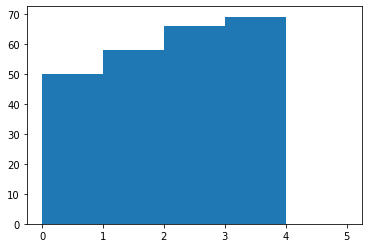

In [99]:
plt.hist(phase2["best_tip"],  bins=np.arange(6))

In [100]:
phase2.to_csv("phase2_control_label.csv", index=False)

In [ ]:
### visualize the distributions